
 # SKYNET

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import json
#import gmaps
#import gmaps.datasets
#gmaps.configure(api_key = )
from pandas.io.json import json_normalize
import os.path
import scipy.stats as stats
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot as pl, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from collections import Counter

WRANGLING

LOAD ALL FILES INTO INDIVIDUAL DATA FRAMES AND LOOK FOR COMMONALITIES

In [2]:
#os.path.join
clean_dir = '/home/skultra/Springboard/Code/Capstone-1/Drone_Data/Clean_CSV'

In [3]:
us_yemen_path = os.path.join(clean_dir, 'US_Yemen_updated.csv')
cia_pakistan_path = os.path.join(clean_dir, 'CIA_Pakistan_updated.csv')
us_somalia_path = os.path.join(clean_dir, 'US_Somalia_updated.csv')
us_afghanistan_path = os.path.join(clean_dir, 'US_Afghanistan_Data.csv')

In [4]:
#CIA_Pakistan_clean_data
pakistan = pd.read_csv(cia_pakistan_path)
#US_Somalia_clean_data 
somalia = pd.read_csv(us_somalia_path)
#US_Yemen_clean_data 
yemen = _data = pd.read_csv(us_yemen_path)
#US_Afghanistan_clean_data 
afghanistan = pd.read_csv(us_afghanistan_path)

In [5]:
afghanistan['ID'] = ''
afghanistan["ID"] = afghanistan['Strike ID'].apply(lambda x : x.strip()[:3])
somalia["ID"] = somalia['Strike ID'].apply(lambda x : x.strip()[:3])
pakistan["ID"] = 'P'
yemen["ID"] = yemen['Strike ID'].apply(lambda x : x.strip()[:3])


In [6]:
frames = [afghanistan, yemen, somalia, pakistan]
frames_dict= {}
frames_dict['Afghanistan'] = afghanistan
frames_dict['Pakistan'] = pakistan
frames_dict['Somalia'] = somalia
frames_dict['Yemen'] = yemen


master_frame = pd.concat(frames, ignore_index=True)
# for frame in frames:
#     print(frame.shape)
#     print(frame.head(2))
master_frame.head(5)

,Air strike?,Area,"Counter- terrorism, force protection or strategic effects?",Date,Drone strike,ID,Index,Location,Maximum children killed,Maximum civilians killed,...,Reported target group?,Reported target type,Strike ID,Strike link,Time,Type of attack,US confirmed?,US only source?,Unnamed: 0,Village/local area
0,NaN,NaN,FP,01/01/2015,0.0,AFG,77,Spera,0,0,...,-,-,AFG001,http://www.thebureauinvestigates.com/2015/02/1...,-,US strike,1,1.0,0,Unknown
1,NaN,NaN,-,03/01/2015,0.0,AFG,3,Gayan,0,0,...,-,Convoy,AFG002,http://www.thebureauinvestigates.com/2015/02/1...,Early morning/late evening,US strike,0,0.0,1,Unknown
2,NaN,NaN,FP,03/01/2015,0.0,AFG,4,Spera,0,0,...,Haqqani,Convoy,AFG003,http://www.thebureauinvestigates.com/2015/02/1...,Early morning,US strike,1,0.0,2,Unknown
3,NaN,NaN,-,06/01/2015,0.0,AFG,120,Dara I Pech,0,0,...,-,-,AFG004,http://www.thebureauinvestigates.com/2015/02/1...,-,US strike,1,1.0,3,Unknown
4,NaN,NaN,-,07/01/2015,1.0,AFG,5,Unknown,0,0,...,-,-,AFG005,http://www.thebureauinvestigates.com/2015/02/1...,-,US strike,0,0.0,4,Unknown


In [7]:
#MasterFrame.columns
#MasterFrame.shape
master_frame.info()
master_frame.convert_objects(convert_numeric=True).dtypes 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 31 columns):
Air strike?                                                   385 non-null float64
Area                                                          430 non-null object
Counter-
terrorism, force protection or strategic effects?    442 non-null object
Date                                                          1257 non-null object
Drone strike                                                  827 non-null float64
ID                                                            1257 non-null object
Index                                                         1257 non-null int64
Location                                                      1256 non-null object
Maximum children killed                                       1257 non-null int64
Maximum civilians killed                                      1257 non-null int64
Maximum number of strikes                                     299 no

/home/skultra/Springboard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



Air strike?                                                    float64
Area                                                            object
Counter-\nterrorism, force protection or strategic effects?     object
Date                                                            object
Drone strike                                                   float64
ID                                                              object
Index                                                            int64
Location                                                        object
Maximum children killed                                          int64
Maximum civilians killed                                         int64
Maximum number of strikes                                      float64
Maximum people injured                                           int64
Maximum people killed                                            int64
Maximum strikes                                                float64
Minimu

In [8]:
s = pd.Series(master_frame['ID'])
k = pd.DataFrame()
k = pd.get_dummies(s)
master_frame=master_frame.join(k)
print(master_frame.columns)


Index(['Air strike?', 'Area',
       'Counter-\nterrorism, force protection or strategic effects?', 'Date',
       'Drone strike', 'ID', 'Index', 'Location', 'Maximum children killed',
       'Maximum civilians killed', 'Maximum number of strikes',
       'Maximum people injured', 'Maximum people killed', 'Maximum strikes',
       'Minimum children killed', 'Minimum civilians killed',
       'Minimum number of strikes', 'Minimum people injured',
       'Minimum people killed', 'Minimum strikes', 'Province',
       'Reported target group?', 'Reported target type', 'Strike ID',
       'Strike link', 'Time', 'Type of attack', 'US confirmed?',
       'US only source?', 'Unnamed: 0', 'Village/local area', 'AFG', 'P',
       'SOM', 'YEM'],
      dtype='object')


LOAD JSON FILE CREATED FROM CIA TWITTER FEED

In [9]:
#with keyword automatically closes file at the end
with open('/home/skultra/Springboard/Code/Capstone-1/Drone_Data/Drone_Data.json') as f:
    twitter_drone = json.load(f)
twitter_drone.keys()
    
#JSON_DF_stats['status'] = pd.DataFrame(twitter_drone)
JSON_DF_stats = pd.DataFrame(twitter_drone['strike'])
# remove all the columns, that are not common
# combine all the data frames into one
# look at pandas documentation, combine things into one big data frame
# do same for both sets of data, get 2 clean dataframes, 
JSON_DF_stats.head(2)

,_id,articles,bij_link,bij_summary_short,bureau_id,children,civilians,country,date,deaths,...,injuries,lat,location,lon,names,narrative,number,target,town,tweet_id
0,55c79e711cbee48856a30886,[],http://www.thebureauinvestigates.com/2012/03/2...,In the first known US targeted assassination u...,YEM001,,0,Yemen,2002-11-03T00:00:00.000Z,6,...,,15.47467,Marib Province,45.322755,"[Qa'id Salim Sinan al-Harithi, Abu Ahmad al-Hi...",In the first known US targeted assassination u...,1,,,278544689483890688
1,55c79e711cbee48856a30887,[],http://www.thebureauinvestigates.com/2011/08/1...,First known drone strike in Pakistan kills at ...,B1,2,2,Pakistan,2004-06-17T00:00:00.000Z,6-8,...,1,32.30512565,South Waziristan,69.57624435,"[Nek Mohammad, Fakhar Zaman, Azmat Khan, Marez...",The first known fatal US drone strike inside P...,2,Nek Mohammed,Wana,278544750867533824


In [10]:
pakistan_counter = Counter(pakistan.ID)
print(pakistan_counter)
id_counter = Counter(master_frame['ID'])
print(id_counter)

Counter({'P': 430})
Counter({'AFG': 442, 'P': 430, 'YEM': 299, 'SOM': 86})


In [11]:
#     from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#     from sklearn.linear_model import LinearRegression

#     IDlabel = LabelEncoder()

#     categorical_variables = master_frame['ID'] 
#     s_labels = IDlabel.fit_transform(master_frame['ID'])
#     master_frame['ID'] = s_labels

#     cat_var = OneHotEncoder()
#     #cat_var.fit(categorical_variables)

#     #for cat in categorical_variables: 
#     #cat_fi_tr = cat_var.fit_transform(categorical_variables)
#     #cat_fi_tr.todense()

#     master_frame.head(3)
#     #cat_var_arr = cat_var.fit_trans()
#     #pd: master_frame


VISUALIZATION

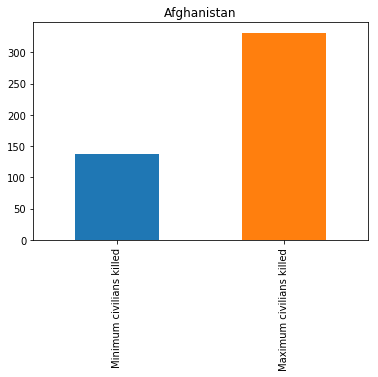

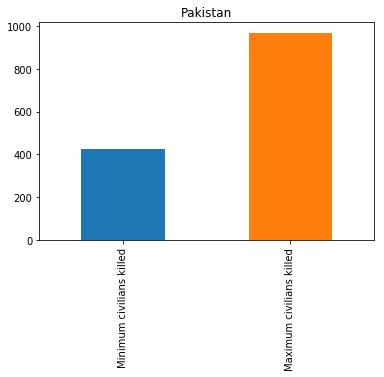

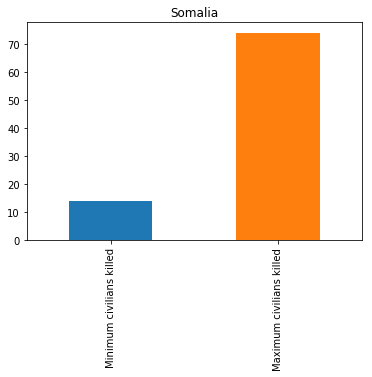

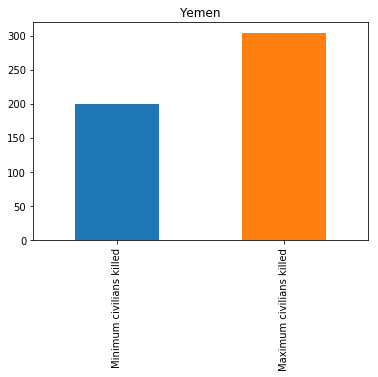

In [12]:
#Count something interesting
# of civilian deaths per AO
# Somalia has the greatest fluctuation between known civlian deaths and unknown civilian deaths
for key,value in frames_dict.items():
    cols = ['Minimum civilians killed', 'Maximum civilians killed']    
    value[cols].sum().plot.bar(title=key)
    plt.show()

#set the dictionary key as name of 
#for key, value in dictionary.items:
    

Investigating the trend of drone related deaths over time using a line graph. 
    

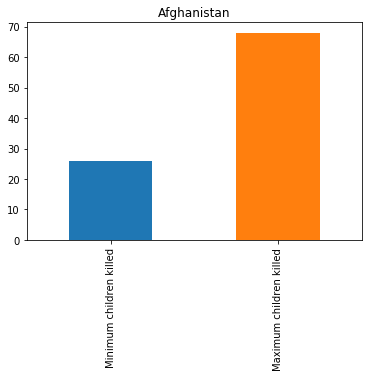

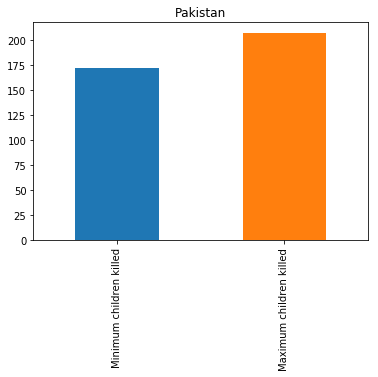

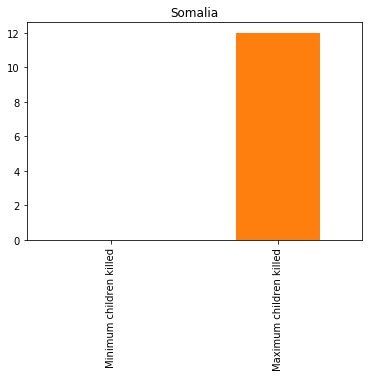

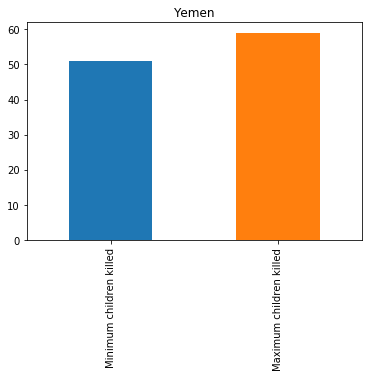

In [13]:
#subset out and take each seperately, 
for key,value in frames_dict.items():
    cols = ['Minimum children killed', 'Maximum children killed']    
    value[cols].sum().plot.bar(title=key)
    plt.show()

Least number of children killed in Somalia, most number in Yemen. 

Immediate goals: do heatmap visualization, children killed, count based columns, heatmap, clustering, some count based columns(bar chart or pie char)
statistiscal 
after: basic writeups nad documentation
    
NLP featurization-preprocessing test, clean text data
basic supervised ML for classification: random forest, svm, logistic regressions, boosting, bagging vs. boosting
measuring accuracy, precision, recall, f1 score
        

In [14]:
import colorama

def country_color(country):
    if country is 'Pakistan':
        color = 'red'
    elif country is 'Yemen':
        color = 'blue'
    elif country is 'Somalia':
        color = 'green'
   

In [27]:
country_plot = JSON_DF_stats[['country', 'lon', 'lat']]
country_plot['colors'] = ''
country_color(country_plot.country)

/home/skultra/Springboard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [30]:

plotly.tools.set_credentials_file(username='leenpaws', api_key='Yvlmp4HJVzmDIWh29468')

trace = dict(
    type = 'scattergeo',
    lon = country_plot.lon, lat = country_plot.lat,
    marker = country_plot.colors,
    mode = 'markers',
    validate = False) 
py.iplot([trace],validate=False)




INFERENTIAL STATISTICS

In Yemen, Somalia, and Pakistan, most strikes are concentrated towards the coastal and country borders, possibly to ensure movement between jurisdictions aren't free.

In [17]:
def paired_difference_test(frame1, frame2):
    df1_population = []
    df2_population = []
#get the mean difference
    df1_population = .5 * (frame1['Maximum civilians killed'] -frame1['Minimum civilians killed'])
    df2_population = .5 * (frame2['Maximum civilians killed'] - frame2['Minimum civilians killed'])
    meand = df1_population.mean() - df2_population.mean()
    
#get std deviation of each group    
    df1_population_std = df1_population.std()
    df2_population_std = df2_population.std()
    
#get size of each group    
    df1_population_ratio_size = len(df1_population)
    df2_population_ratio_size = len(df2_population)
    
#get standard error
    SE = math.sqrt(((df2_population_std*df2_population_std)/df1_population_ratio_size)+
                   ((df1_population_std*df1_population_std)/df2_population_ratio_size))   
#z-score
    z_score = meand/SE
    
    
#calculate p-value
    p_value = stats.norm.sf(abs(z_score))
    
    print("Standard Error:", SE)
    print("z_score", z_score)
    print("p_value", p_value)
    
#    df1.head()
    
'''meanD = df100_ratio_mean - df1000_ratio_mean 
# Get the standard deviation of each group () df100_ratio_std = df100['Excess Readmission Ratio'].std()
df1000_ratio_std = df1000['Excess Readmission Ratio'].std() 
# Get the size of each group (n) df100_ratio_size = len(df100) df1000_ratio_size = len(df1000) 
# Calculate Standard Error (SE) 
SE = math.sqrt(((df100_ratio_std*df100_ratio_std)/df100_ratio_size)+
((df1000_ratio_std*df1000_ratio_std)/df1000_ratio_size) )
# Calculate Z-Score z_score = meanD / SE z_score'''

"meanD = df100_ratio_mean - df1000_ratio_mean \n# Get the standard deviation of each group () df100_ratio_std = df100['Excess Readmission Ratio'].std()\ndf1000_ratio_std = df1000['Excess Readmission Ratio'].std() \n# Get the size of each group (n) df100_ratio_size = len(df100) df1000_ratio_size = len(df1000) \n# Calculate Standard Error (SE) \nSE = math.sqrt(((df100_ratio_std*df100_ratio_std)/df100_ratio_size)+\n((df1000_ratio_std*df1000_ratio_std)/df1000_ratio_size) )\n# Calculate Z-Score z_score = meanD / SE z_score"

In [18]:
print("Afghanistan:Yemen")
paired_difference_test(afghanistan, yemen)

print("\nAfghanistan:Somalia")
paired_difference_test(afghanistan, somalia)

print("\nAfghanistan:Pakistan")
paired_difference_test(afghanistan, pakistan)

print("\nYemen:Somalia")
paired_difference_test(yemen, somalia)

print("\nYemen:Pakistan")
paired_difference_test(yemen, pakistan)

print("\nSomalia:Pakistan")
paired_difference_test(somalia, pakistan)


Afghanistan:Yemen
Standard Error: 0.10054440569449044
z_score 0.43634182320427434
p_value 0.3312943708584498

Afghanistan:Somalia
Standard Error: 0.1871807508145979
z_score -0.6912045985744322
p_value 0.2447184872056169

Afghanistan:Pakistan
Standard Error: 0.11288259126005473
z_score -3.6698654064693788
p_value 0.00012133910577461915

Yemen:Somalia
Standard Error: 0.1311606424123993
z_score -1.3209139711030473
p_value 0.09326502538232784

Yemen:Pakistan
Standard Error: 0.10917268276636354
z_score -4.196431143238104
p_value 1.3557692396099529e-05

Somalia:Pakistan
Standard Error: 0.20328480387672884
z_score -1.4014019518300296
p_value 0.08054695447254817


In [19]:
master_frame.columns[5:35]                        

Index(['ID', 'Index', 'Location', 'Maximum children killed',
       'Maximum civilians killed', 'Maximum number of strikes',
       'Maximum people injured', 'Maximum people killed', 'Maximum strikes',
       'Minimum children killed', 'Minimum civilians killed',
       'Minimum number of strikes', 'Minimum people injured',
       'Minimum people killed', 'Minimum strikes', 'Province',
       'Reported target group?', 'Reported target type', 'Strike ID',
       'Strike link', 'Time', 'Type of attack', 'US confirmed?',
       'US only source?', 'Unnamed: 0', 'Village/local area', 'AFG', 'P',
       'SOM', 'YEM'],
      dtype='object')

PCA & KMeans

In [20]:
scaler = StandardScaler()

pca = PCA(n_components = 4)
#master_frame_update_new = master_frame_new.columns[5:19]
#master_frame_update_new.join(master_frame_new.columns[5])
master_frame_updated = master_frame[['Maximum children killed',
       'Maximum civilians killed', 'Maximum number of strikes',
       'Maximum people injured', 'Maximum people killed', 'Maximum strikes',
       'Minimum children killed', 'Minimum civilians killed',
       'Minimum number of strikes', 'Minimum people injured',
       'Minimum people killed', 'Minimum strikes', 'AFG', 'P',
       'SOM', 'YEM']]

#master_frame_updated = master_frame_updated.drop('Unnamed: 0', 1, inplace=True)
#master_frame_updated.convert_objects(convert_numeric=True).dtypes 
#print(master_frame_updated.head(3))
master_frame_updated = master_frame_updated.fillna(0)
scaled_frame = scaler.fit_transform(master_frame_updated)

pca_features = pca.fit_transform(scaled_frame)
print(pca_features)

# Assign 0th column of pca_features: xs
#xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
#ys = pca_features[:,1]

# Scatter plot xs vs ys
#plt.scatter(xs, ys)
#plt.axis('equal')
#plt.show()

# Create scaler: scaler
#scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_frame)


# Create pipeline: pipeline
#pipeline = make_pipeline(scaler,kmeans)

#pipeline.fit()


[[-0.94250735 -0.69337599  0.51260882  0.72864738]
 [ 0.06562542 -0.86177807  0.3792533  -0.28528973]
 [-0.55045571 -0.75886569  0.46074834  0.3343385 ]
 ...
 [-0.41757967 -0.51102993 -0.79168588  0.54922496]
 [-0.33013771 -0.524929   -0.80682389  0.45429697]
 [-0.55987212 -0.48074891 -0.68983801  0.78404912]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
clusters = kmeans.labels_

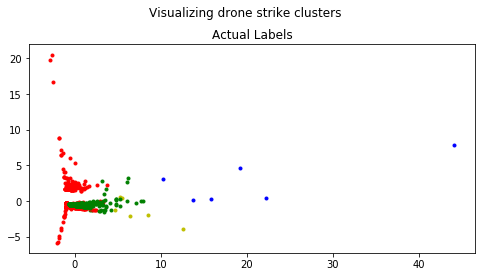

In [22]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 4))
fig.suptitle('Visualizing drone strike clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
#ax2.set_title('Clustered Labels')
y = clusters
bc_pca = pca_features
for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
    if y[i] == 2:
        c3 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='b', marker='.')
    if y[i] == 3:
        c4 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='y', marker='.')
        

In [23]:
import os
import os.path as op
from time import time
import dask.dataframe as ddf
import dask.array as da
from distributed import Client


def make_categorical_data(n_samples=int(1e7), n_features=10):
    """Generate some random categorical data
    The default parameters should generate around 1GB of random integer data
    with increasing cardinality along with a normally distributed real valued
    target variable.
    """
    feature_names = ['f_%03d' % i for i in range(n_features)]
    features_series = [
        da.random.randint(low=0, high=(i + 1) * 10, size=n_samples,
                          chunks=n_samples // 10)
        for i in range(n_features)
    ]
    features_series = [
        ddf.from_dask_array(col_data, columns=[feature_name])
        for col_data, feature_name in zip(features_series, feature_names)
    ]
    target = da.random.normal(loc=0, scale=1, size=n_samples,
                              chunks=n_samples // 10)
    target = ddf.from_dask_array(target, columns=['target'])

In [ ]:
import os
import os.path as op
from time import time
import dask.dataframe as ddf
import dask.array as da
from distributed import Client


def make_categorical_data(n_samples=int(1e7), n_features=10):
    """Generate some random categorical data
    The default parameters should generate around 1GB of random integer data
    with increasing cardinality along with a normally distributed real valued
    target variable.
    """
    feature_names = ['f_%03d' % i for i in range(n_features)]
    features_series = [
        da.random.randint(low=0, high=(i + 1) * 10, size=n_samples,
                          chunks=n_samples // 10)
        for i in range(n_features)
    ]
    features_series = [
        ddf.from_dask_array(col_data, columns=[feature_name])
        for col_data, feature_name in zip(features_series, feature_names)
    ]
    target = da.random.normal(loc=0, scale=1, size=n_samples,
                              chunks=n_samples // 10)
    target = ddf.from_dask_array(target, columns=['target'])